# Лабораторная работа по 3 модели

## 🥕 Команда __Морковцы__ 🥕
- 🐰 Меркулов Александр
- 🐇 Калугин Евгений
- 🐷 Фомин Дмитрий
- 🐎 Чукаев Иван

## Описание модели

На вход $n$-канальной СМО поступает простейший поток заявок с интенсивностью $\lambda$.

Интенсивность простейшего потока обслуживания каждого канала $\mu$.

Если заявка застаёт все каналы свободными, она принимается на обслуживание и обслуживается любым одним из $n$-каналов.

Если заявка застаёт свободным хотя бы один канал, то она принимается на обслуживание любым из свободных каналов и обслуживается до конца.

Если заявка застаёт все каналы занятыми, то она получает отказ (покидает систему не обслуженной).

После окончания обслуживания одной заявки освобождается один канал.

Состояние рассмотренной системы будем связывать с числом заявок, находящихся в системе.

## Постановка задачи

В городе имеется n сервисов техобслуживания.

Сервисы обслуживают $\mu$ машин в день, интенсивность входного потока заявок - $\lambda$ машин в день. 

После окончания обслуживания один сервис освобождается. 

Если вновь прибывшая машина застаёт свободным хотя бы один сервис, то она принимается на обслуживание одним из свободных сервисов. 

Если нет свободных сервисов в городе, то машина уезжает на обслуживание в другой город.

## Граф состояний

![image.png](./images/graph.jpg)

## Мат. модель

### Вероятностное пространство

1\) $\;\Omega=\{S=(S_1,\;S_2,\:\dots\:,\:S_n)\:|\:S_i\in\{0,\:1\}\},\:где\:i=\overline{1,n},\;\{0,\:1\}\:-\:сервис\:не\:занят/занят$

2\) $\;\mathfrak{F}=2^\Omega$

3\) $\;P\big(\sum_{i=1}^nS_i=0\big)=\displaystyle\frac{1}{\sum_{i=0}^n\big(\frac{\lambda}{\mu}\big)^i\frac{1}{i!}}=\Pi_0$

$\;P\Big(\sum_{i=1}^nS_i=k\Big)=\displaystyle\Big(\frac{\lambda}{\mu}\Big)^k\frac{1}{k!}\Pi_0=\Pi_k$

### Уравнения баланса

0\) $\;\mu\Pi_1=\lambda\Pi_0$

1\) $\;\lambda\Pi_0+2\mu\Pi_2=(\lambda+\mu)\Pi_1$

2\) $\;\lambda\Pi_1+3\mu\Pi_3=(\lambda+2\mu)\Pi_2$

…

k) $\;\lambda\Pi_{k-1}+(k+1)\mu\Pi_{k+1}=(\lambda+k\mu)\Pi_k$

…

n) $\;\lambda\Pi_{n-1}= n\mu\Pi_n$

### Вычисление $\Pi_0$

1\) $\;\Pi_1=\frac{\lambda}{\mu}\Pi_0$<br>

2\) $\;2\mu\Pi_2=(\lambda+\mu)\Pi_1-\lambda\Pi_0$ <br><br>&nbsp;&nbsp;&nbsp;
    $\;2\mu\Pi_2=(\lambda+\mu)\frac{\lambda}{\mu}\Pi_0-\lambda\Pi_0$ <br><br>&nbsp;&nbsp;&nbsp;
    $\;2\mu\Pi_2=\frac{\lambda^2+\lambda\mu-\lambda\mu}{\mu}\Pi_0$ <br><br>&nbsp;&nbsp;&nbsp;
    $\;\Pi_2=\frac{1}{2}(\frac{\lambda}{\mu})^2\Pi_0$ 

3\) $\;3\mu\Pi_3=(\lambda+2\mu)\Pi_2-\lambda\Pi_1$ <br><br>&nbsp;&nbsp;&nbsp;
    $\;3\mu\Pi_3=(\lambda+2\mu)(\frac{1}{2})(\frac{\lambda}{\mu})^2\Pi_0-\lambda\frac{\lambda}{\mu}\Pi_0$ <br><br>&nbsp;&nbsp;&nbsp;
    $\;3\mu\Pi_3=(\frac{\lambda}{\mu})^2(\frac{1}{2}(\lambda+2\mu)\Pi_0-\mu\Pi_0)$ <br><br>&nbsp;&nbsp;&nbsp;
    $\;3\mu\Pi_3=(\frac{\lambda}{\mu})^2\frac{\lambda}{2}\Pi_0$ <br><br>&nbsp;&nbsp;&nbsp;
    $\;\Pi_3=(\frac{\lambda}{\mu})^3\frac{1}{2\cdot3}\Pi_0$ <br>

…

k)  $\;\Pi_k=(\frac{\lambda}{\mu})^k\frac{1}{k!}\Pi_0$

0\) $\;\displaystyle\Pi_0=\frac{1}{\sum_{k=0}^n\Pi_k}=\frac{1}{\sum_{k=0}^n\big(\frac{\lambda}{\mu}\big)^k\frac{1}{k!}}$

## Программа

### Импорты

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Функции 

In [2]:
def get_list_Pi(Lambda: float, Mu: float, n: int) -> list[float]:
    list_Pi = []
    for i in range(n + 1):
        list_Pi.append(((Lambda / Mu)**i) / math.factorial(i))
    
    return list_Pi

In [3]:
def get_Pi_0(list_Pi: list[float]) -> float:
    return 1/sum(list_Pi)

In [4]:
def get_mean_busy_services(list_Pi: list) -> float:
    sum = 0 
    for i in range(len(list_Pi)):
        sum += i * list_Pi[i]
        
    return sum

In [5]:
# Получение состояний системы в определенные моменты времени

def get_states(Lambda: float, Mu: float, n: int, interval: int) -> np.ndarray:
    cur_cars = 0
    states = [0]

    for _ in range(interval):
        if cur_cars == 0:
            if np.random.poisson(Lambda, 1) != [0]:
                cur_cars += 1 # принимаем машину

        elif 0 < cur_cars < n:
            if np.random.poisson(Lambda, 1) != [0]: 
                cur_cars += 1 # принимаем машину
            if np.random.poisson(Mu * cur_cars, 1) != [0]: 
                cur_cars -= 1 # обслуживаем машину

        elif cur_cars == n:
            if np.random.poisson(Mu * cur_cars, 1) != [0]:
                cur_cars -= 1 # обслуживаем машину

        states.append(cur_cars)
        
    return states

In [6]:
def show_plot_mean_states(states: np.ndarray) -> None:
    mean_states = []
    summa = 0;

    for i in range(1, len(states) +  1) :
        summa += states[i - 1]
        mean_states.append(summa / i)

    plt.plot(mean_states)
    plt.show()

## Эксперименты

Lambda = 6, Mu = 5, n = 4
Pi_0 = 0.304, распределение: [0.304, 0.364, 0.219, 0.087, 0.026]
Среднее количество занятых сервисов по формуле: 1.169
Среднее количество занятых сервисов по выборке: 1.132


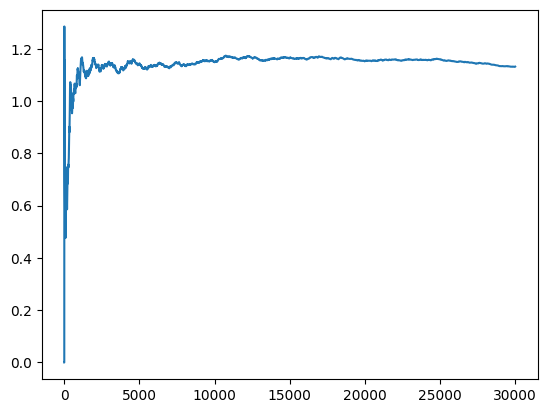

Lambda = 20, Mu = 5, n = 4
Pi_0 = 0.029, распределение: [0.029, 0.117, 0.233, 0.311, 0.311]
Среднее количество занятых сервисов по формуле: 2.757
Среднее количество занятых сервисов по выборке: 2.673


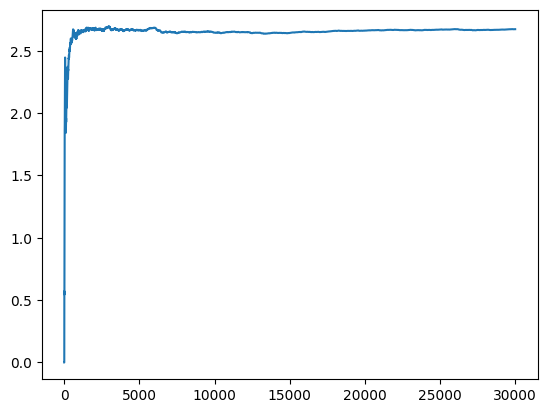

Lambda = 100, Mu = 5, n = 4
Pi_0 = 0.0, распределение: [0.0, 0.002, 0.024, 0.162, 0.811]
Среднее количество занятых сервисов по формуле: 3.781
Среднее количество занятых сервисов по выборке: 3.425


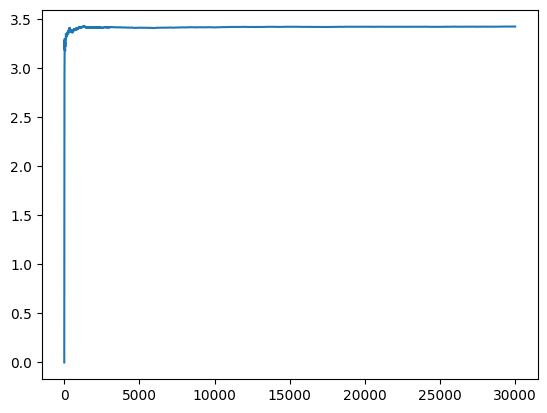

Lambda = 6, Mu = 15, n = 4
Pi_0 = 0.67, распределение: [0.67, 0.268, 0.054, 0.007, 0.001]
Среднее количество занятых сервисов по формуле: 0.4
Среднее количество занятых сервисов по выборке: 0.453


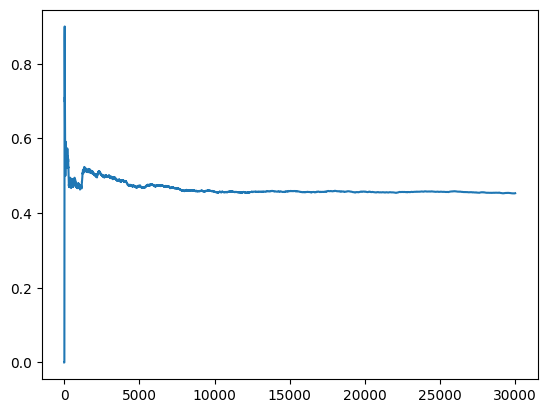

Lambda = 6, Mu = 100, n = 4
Pi_0 = 0.942, распределение: [0.942, 0.057, 0.002, 0.0, 0.0]
Среднее количество занятых сервисов по формуле: 0.06
Среднее количество занятых сервисов по выборке: 0.224


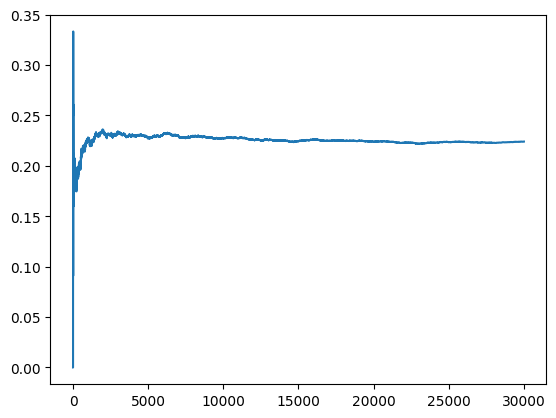

Lambda = 6, Mu = 5, n = 20
Pi_0 = 0.301, распределение: [0.301, 0.361, 0.217, 0.087, 0.026, 0.006, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Среднее количество занятых сервисов по формуле: 1.2
Среднее количество занятых сервисов по выборке: 1.14


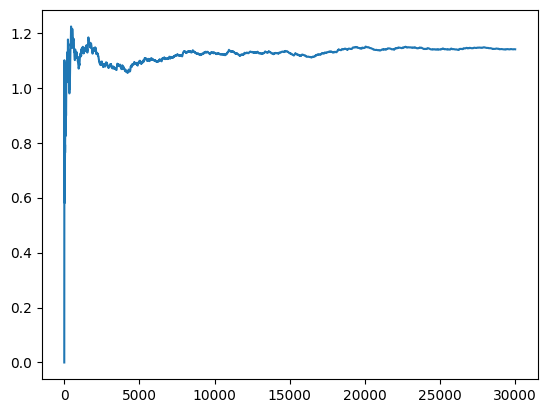

Lambda = 6, Mu = 5, n = 1
Pi_0 = 0.455, распределение: [0.455, 0.545]
Среднее количество занятых сервисов по формуле: 0.545
Среднее количество занятых сервисов по выборке: 0.529


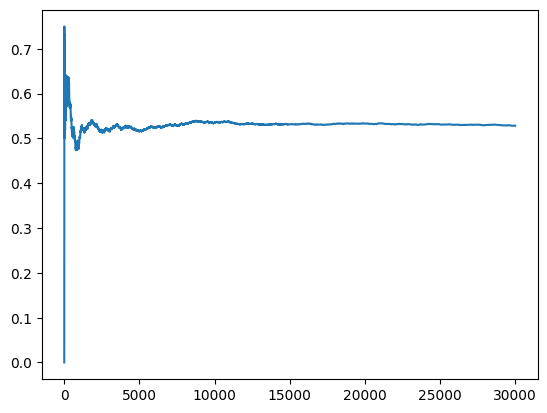

In [7]:
list_variables = [[6, 5, 4], [20, 5, 4], [100, 5, 4], [6, 15, 4], [6, 100, 4], [6, 5, 20], [6, 5, 1]]
interval = 30000

for [Lambda, Mu, n] in list_variables:
    list_Pi = get_list_Pi(Lambda, Mu, n)
    Pi_0 = get_Pi_0(list_Pi)
    distribution = [Pi_k * Pi_0 for Pi_k in list_Pi]
    mean_busy_services = get_mean_busy_services(distribution)

    Lambda_per_day = Lambda/24
    Mu_per_day = Mu/24
    states = get_states(Lambda_per_day, Mu_per_day, n, interval)
    mean_states = np.mean(states)

    print(f'Lambda = {Lambda}, Mu = {Mu}, n = {n}')
    print(f'Pi_0 = {round(Pi_0, 3)}, распределение: {[round(elem, 3) for elem in distribution]}')
    print(f'Среднее количество занятых сервисов по формуле: {round(mean_busy_services, 3)}')
    print(f'Среднее количество занятых сервисов по выборке: {round(mean_states, 3)}')

    show_plot_mean_states(states)

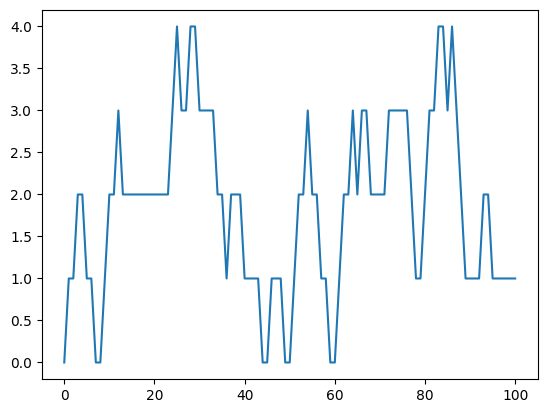

In [8]:
states = get_states(10/24, 5/24, 4, 100)

plt.plot(states)
plt.show()

## Вывод

![image.png](./images/secret.jpg)